In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
series = pd.read_csv("cleanData.csv",index_col=0)

In [4]:
series

,Date,AAPL,AMZN,FSPTX,SHRAX,SPY
0,2017-11-06,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-07,0.008934,0.014056,0.002510,-0.002462,0.002594
2,2017-11-08,0.013285,0.012325,0.006747,-0.004167,0.000658
3,2017-11-09,0.015896,0.015156,-0.000889,-0.006771,-0.002207
4,2017-11-10,0.015896,0.015282,0.004132,-0.007150,-0.002207
...,...,...,...,...,...,...
1254,2022-10-31,2.554215,0.867376,-0.033000,-0.464012,0.496090
1255,2022-11-01,2.598770,0.875130,-0.038230,-0.465006,0.510414
1256,2022-11-02,2.456518,0.754857,-0.074839,-0.482811,0.486256
1257,2022-11-03,2.296629,0.667403,-0.099943,-0.484894,0.438134


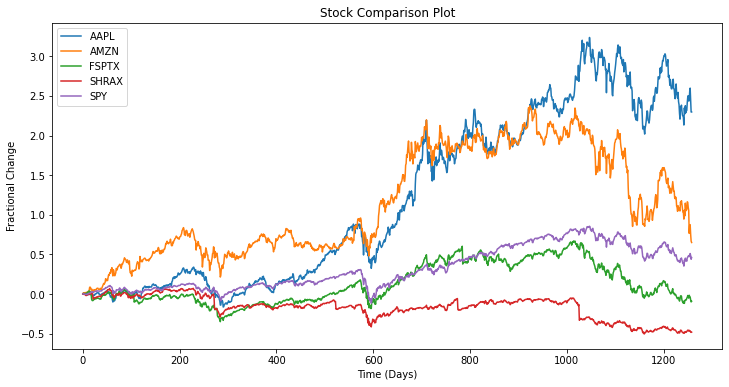

In [11]:
plt.figure(figsize = (12,6))
t = np.arange(0,len(series["Date"]))

for i in range(1,len(series.columns)):
    plt.plot(t,series[series.columns[i]], label = series.columns[i])

plt.xlabel("Time (Days)")
plt.ylabel("Fractional Change")
plt.title("Stock Comparison Plot")
plt.legend()

# Series Analysis

In [44]:
def analyzeSeries(series,name):
   
    t = np.arange(0,len(series))
    fig, ax = plt.subplots(1,3,figsize=(16,4))
    plt.suptitle(name)
    plt.plot(t,series.diff(1))
    plt.title("First Difference")
    sm.graphics.tsa.plot_acf(series, lags=20, ax=ax[0])
    sm.graphics.tsa.plot_pacf(series, lags=20, ax=ax[1])
    
    return fig

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this 

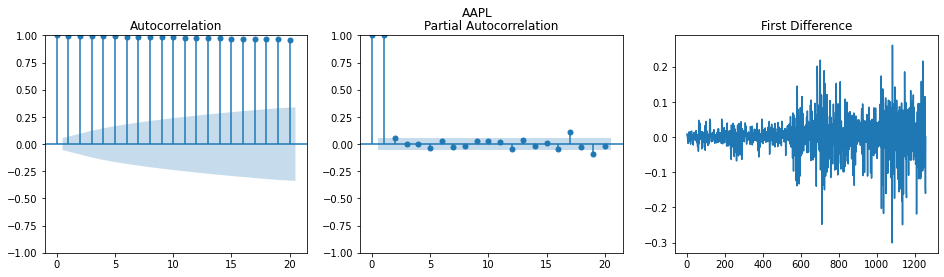

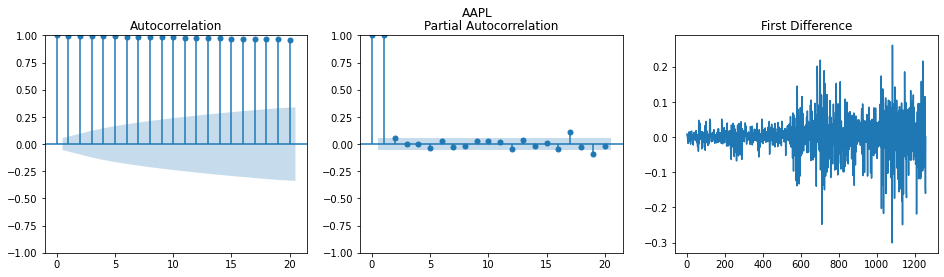

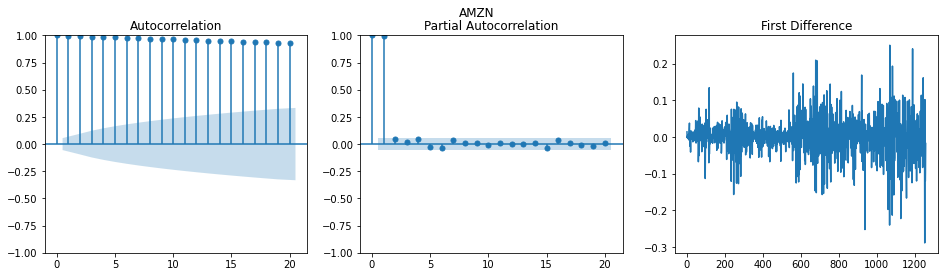

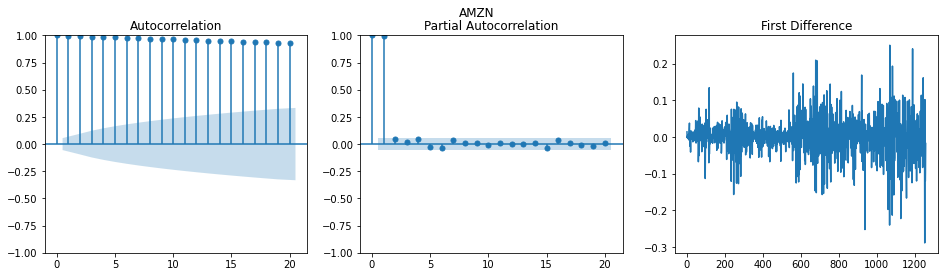

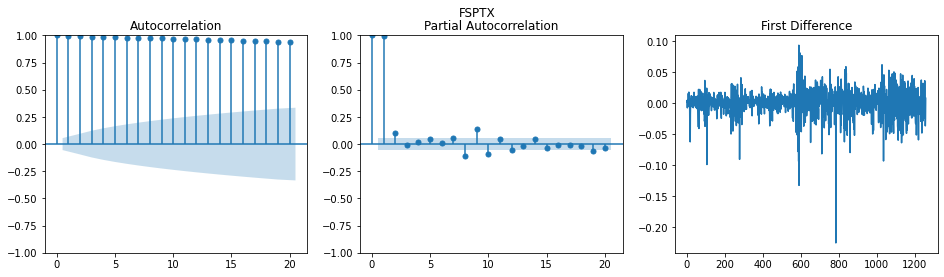

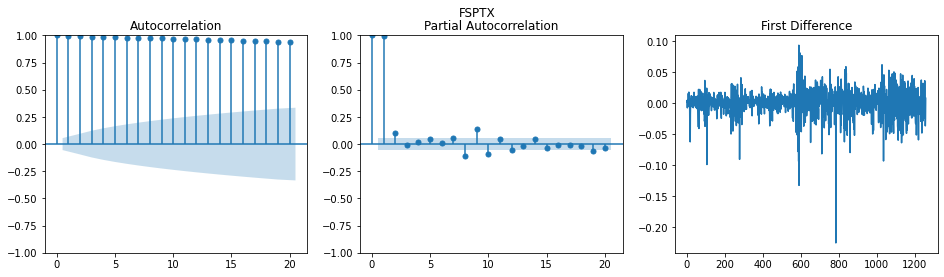

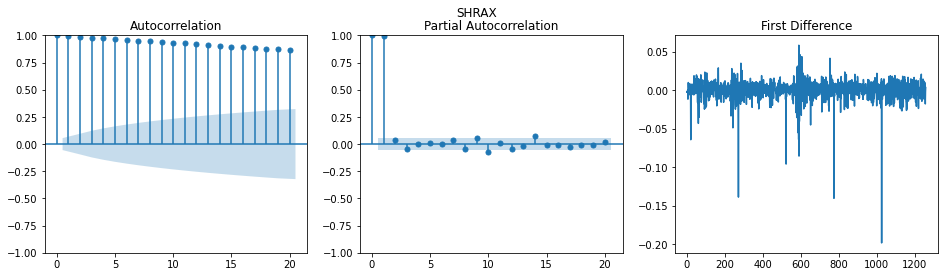

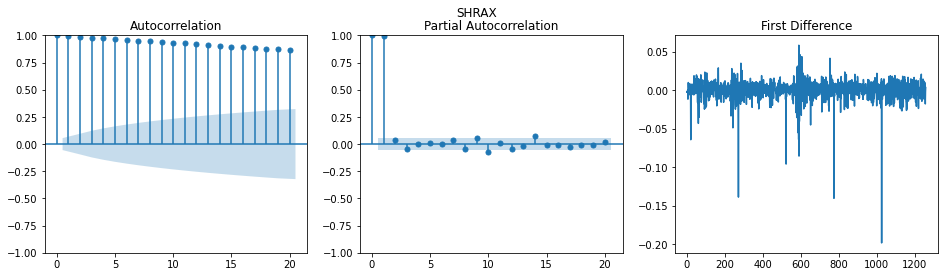

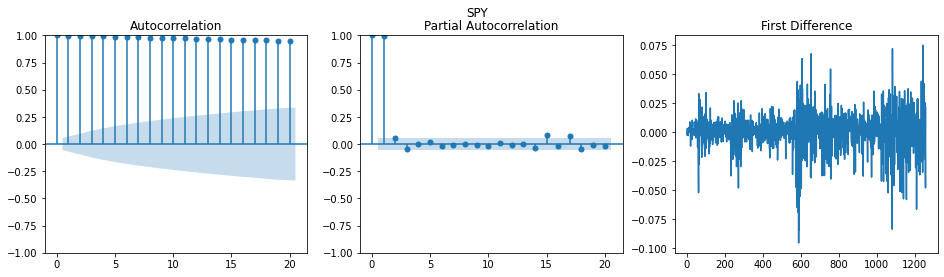

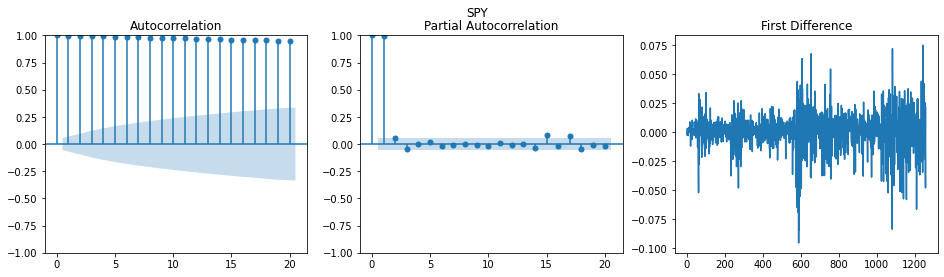

In [45]:
figs = []
for i in series.columns[1:]:
    
    analyzeSeries(series[i],i)
    figs.append(analyzeSeries(series[i],i))

In [62]:
pdf = PdfPages("Analysis.pdf")

for i in figs:
    pdf.savefig(i)
pdf.close()